<a href="https://colab.research.google.com/github/kgeneral/deep-learning-from-scratch-2/blob/master/deep_learning_from_scratch_2_ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kgeneral/deep-learning-from-scratch-2.git

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 574 (delta 20), reused 24 (delta 8), pack-reused 528
Receiving objects: 100% (574/574), 7.90 MiB | 10.17 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [43]:
#!cd deep-learning-from-scratch-2 && git pull 

remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/kgeneral/deep-learning-from-scratch-2
   0a28fc7..94ab233  master     -> origin/master
Updating 0a28fc7..94ab233
Fast-forward
 ch02/count_method_big_gpu.py            |  35 ++
 deep_learning_from_scratch_2_ch02.ipynb | 902 ++++++++++++++++++++++++++++++++
 2 files changed, 937 insertions(+)
 create mode 100644 ch02/count_method_big_gpu.py
 create mode 100644 deep_learning_from_scratch_2_ch02.ipynb


In [0]:
!cp ./deep-learning-from-scratch-2/ch02/* .

In [3]:

!ls -al .

total 44
drwxr-xr-x  1 root root 4096 Jul  2 09:16 .
drwxr-xr-x  1 root root 4096 Jul  2 09:06 ..
drwxr-xr-x  1 root root 4096 Jun 26 16:07 .config
-rw-r--r--  1 root root  892 Jul  2 09:16 count_method_big.py
-rw-r--r--  1 root root  654 Jul  2 09:16 count_method_small.py
drwxr-xr-x 13 root root 4096 Jul  2 09:16 deep-learning-from-scratch-2
-rw-r--r--  1 root root  335 Jul  2 09:16 most_similar.py
-rw-r--r--  1 root root  473 Jul  2 09:16 ppmi.py
drwxr-xr-x  1 root root 4096 Jun 18 16:14 sample_data
-rw-r--r--  1 root root  489 Jul  2 09:16 show_ptb.py
-rw-r--r--  1 root root  415 Jul  2 09:16 similarity.py


In [0]:
!ln -s ./deep-learning-from-scratch-2/common common

In [0]:
!ln -s ./deep-learning-from-scratch-2/dataset dataset

In [6]:
!ls -al common/

total 68
drwxr-xr-x  2 root root  4096 Jul  2 09:16 .
drwxr-xr-x 13 root root  4096 Jul  2 09:16 ..
-rw-r--r--  1 root root  1277 Jul  2 09:16 base_model.py
-rw-r--r--  1 root root    29 Jul  2 09:16 config.py
-rw-r--r--  1 root root   772 Jul  2 09:16 functions.py
-rw-r--r--  1 root root     0 Jul  2 09:16 __init__.py
-rw-r--r--  1 root root  3878 Jul  2 09:16 layers.py
-rw-r--r--  1 root root   341 Jul  2 09:16 np.py
-rw-r--r--  1 root root  3560 Jul  2 09:16 optimizer.py
-rw-r--r--  1 root root 16182 Jul  2 09:16 time_layers.py
-rw-r--r--  1 root root  6406 Jul  2 09:16 trainer.py
-rw-r--r--  1 root root  8836 Jul  2 09:16 util.py


In [8]:
cat count_method_big.py

# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


In [0]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np

np.set_printoptions(threshold=sys.maxsize) # for debug

#from common import config
#config.GPU = True


In [0]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [0]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [14]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [15]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [16]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [0]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성
    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix


In [0]:
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [25]:
print(C)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [0]:
def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출
    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [27]:
c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


In [0]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색
    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [29]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [30]:
most_similar('say', word_to_id, id_to_word, C, top=5)


[query] say
 and: 0.7071067726510136
 .: 0.4999999925000001
 you: 0.0
 goodbye: 0.0
 i: 0.0


In [31]:
most_similar('and', word_to_id, id_to_word, C, top=5)


[query] and
 say: 0.7071067726510136
 you: 0.0
 goodbye: 0.0
 i: 0.0
 hello: 0.0


In [0]:
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [33]:
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [0]:
# SVD
U, S, V = np.linalg.svd(W)

In [35]:
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


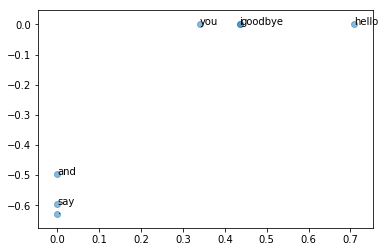

In [36]:
import matplotlib.pyplot as plt
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [37]:
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [46]:
!cat count_method_big_gpu.py

# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

from common import config
config.GPU = True

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


In [0]:
!python count_method_big_gpu.py

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료


In [0]:
#!python count_method_big.py